In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as mpt
import seaborn as sn
from sklearn.impute import SimpleImputer as SI
from sklearn.linear_model import LogisticRegression
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer as Si
import matplotlib.pyplot as mpt
from sklearn.cluster import KMeans
'exec(% matplotlib inline)'

'exec(% matplotlib inline)'

In [74]:
excel_path = r"D:\SEM 6\ML\Book1.xlsx"
df = pd.read_excel(excel_path)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,SI,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,1508.0,3000.0,300.0,1.0,Urban,24.658,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,921.600,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66000.0,365.0,1.0,Urban,650.959,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120220.0,365.0,1.0,Urban,5929.000,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,1410.0,360.0,1.0,Urban,13.907,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71000.0,360.0,1.0,Urban,1400.548,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40000.0,180.0,1.0,Urban,394.521,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,25300.0,360.0,1.0,Urban,998.137,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,180700.0,360.0,1.0,Urban,7128.986,Y


In [75]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,SI
count,614.000000,614.000000,595.000000,597.000000,592.000000,581.000000
mean,5403.459283,1623.701824,41924.321008,341.224456,0.859797,1263.927461
std,6109.041673,2925.518171,73276.235229,65.705974,0.347491,2726.032352
min,150.000000,0.000000,35.000000,36.000000,0.000000,0.345000
25%,2877.500000,0.000000,220.500000,360.000000,1.000000,3.353000
50%,3812.500000,1211.500000,13900.000000,360.000000,1.000000,369.893000
75%,5795.000000,2297.250000,58500.000000,360.000000,1.000000,1400.548000
max,81000.000000,41667.000000,801000.000000,480.000000,1.000000,32917.808000


In [76]:
df.shape

(614, 14)

C:\Users\aniru\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


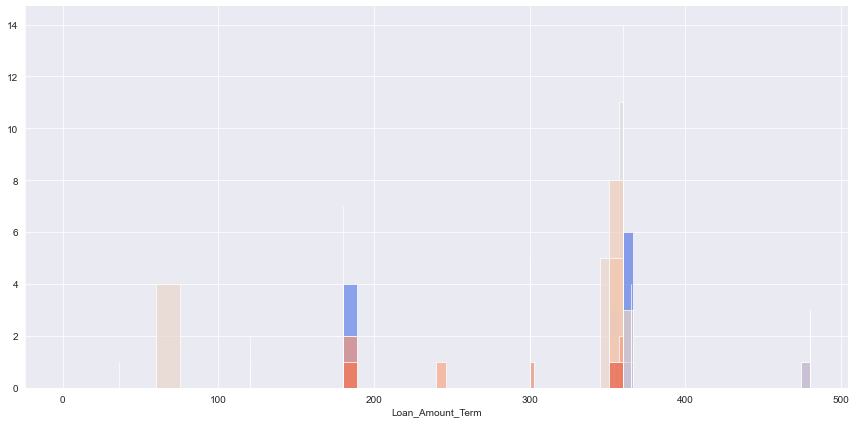

In [77]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="LoanAmount",palette='coolwarm',size=6,aspect=2)
g = g.map(mpt.hist,'Loan_Amount_Term',bins=20,alpha=0.7)

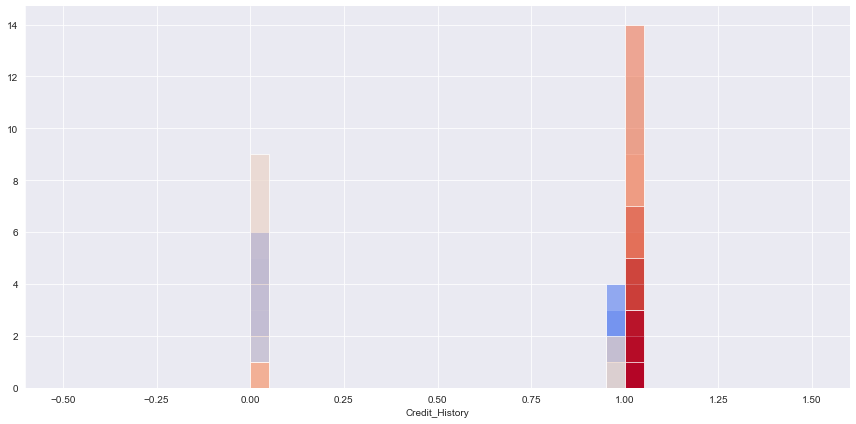

In [78]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="LoanAmount",palette='coolwarm',size=6,aspect=2)
g = g.map(mpt.hist,'Credit_History',bins=20,alpha=0.7)

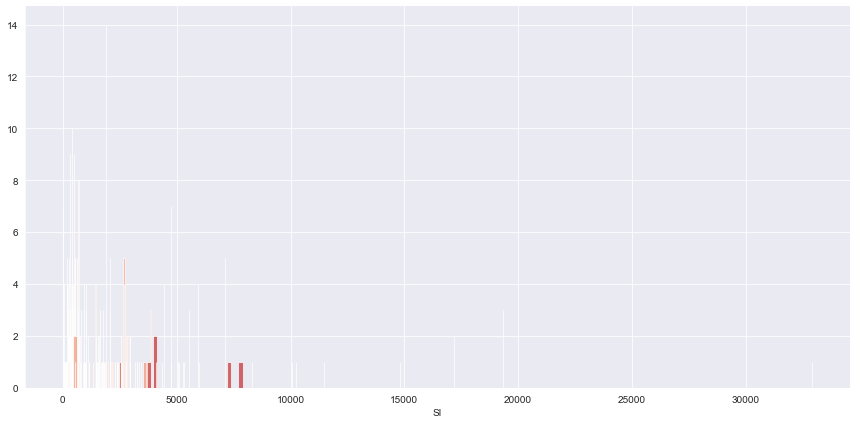

In [79]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="LoanAmount",palette='coolwarm',size=6,aspect=2)
g = g.map(mpt.hist,'SI',bins=20,alpha=0.7)

In [80]:
# number of missing values in each column
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        31
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           19
Loan_Amount_Term     17
Credit_History       22
Property_Area         0
SI                   33
Loan_Status           0
dtype: int64

In [81]:
# dropping the missing values
df = df.dropna()
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
SI                   0
Loan_Status          0
dtype: int64

In [82]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
SI                   float64
Loan_Status           object
dtype: object

In [83]:
# Gender column values
df['Gender'].value_counts()

Male      412
Female     95
Name: Gender, dtype: int64

In [84]:
# Married column values
df['Married'].value_counts()

Yes    327
No     180
Name: Married, dtype: int64

In [85]:
# Dependents column values
df['Dependents'].value_counts()

0     290
1      88
2      88
3+     41
Name: Dependents, dtype: int64

In [86]:
# replacing the value of 3+ to 3
df = df.replace(to_replace='3+', value=3)

In [87]:
# convert categorical columns to numerical values and label encoding
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}, "Loan_Status":{'N':0,'Y':1}},inplace=True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,SI,Loan_Status
0,LP001002,1,0,0,1,0,5849,1508.0,3000.0,300.0,1.0,2,24.658,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,921.600,0
2,LP001005,1,1,0,1,1,3000,0.0,66000.0,365.0,1.0,2,650.959,1
3,LP001006,1,1,0,0,0,2583,2358.0,120220.0,365.0,1.0,2,5929.000,1
4,LP001008,1,0,0,1,0,6000,0.0,1410.0,360.0,1.0,2,13.907,1


In [88]:
## Data Visualization

In [89]:
##Finding Correlation of every fair pair of feature and outcome##
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,SI,Loan_Status
Gender,1.000000,0.362017,0.218534,-0.062547,-0.021849,0.045379,0.189670,0.018693,-0.052961,-0.009525,-0.002364,0.007493,-0.001897
Married,0.362017,1.000000,0.374293,-0.020083,-0.016979,0.026619,0.216693,-0.007790,-0.057996,0.012432,-0.011567,-0.023671,0.050356
Dependents,0.218534,0.374293,1.000000,-0.030378,0.050760,0.119423,0.029051,0.024542,-0.064140,-0.021980,0.049101,0.013850,0.050654
Education,-0.062547,-0.020083,-0.030378,1.000000,0.016552,0.137364,0.064628,-0.023326,0.074403,-0.001251,0.016148,-0.009256,0.004262
Self_Employed,-0.021849,-0.016979,0.050760,0.016552,1.000000,0.159734,-0.006582,-0.062613,-0.104212,-0.158594,-0.070223,-0.051767,-0.117644
ApplicantIncome,0.045379,0.026619,0.119423,0.137364,0.159734,1.000000,-0.102276,0.063404,-0.041527,-0.004517,0.052434,0.087186,-0.022168
CoapplicantIncome,0.189670,0.216693,0.029051,0.064628,-0.006582,-0.102276,1.000000,-0.028135,-0.035560,-0.079860,-0.073766,-0.033244,-0.050365
LoanAmount,0.018693,-0.007790,0.024542,-0.023326,-0.062613,0.063404,-0.028135,1.000000,0.020041,0.200226,0.055751,0.944528,0.353430
Loan_Amount_Term,-0.052961,-0.057996,-0.064140,0.074403,-0.104212,-0.041527,-0.035560,0.020041,1.000000,-0.017209,-0.014097,0.061792,-0.011718
Credit_History,-0.009525,0.012432,-0.021980,-0.001251,-0.158594,-0.004517,-0.079860,0.200226,-0.017209,1.000000,0.110620,0.162677,0.523161


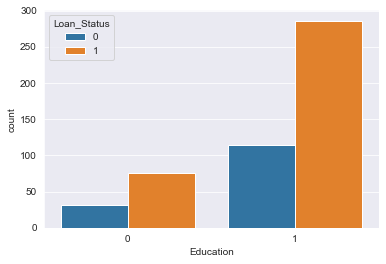

In [90]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=df)

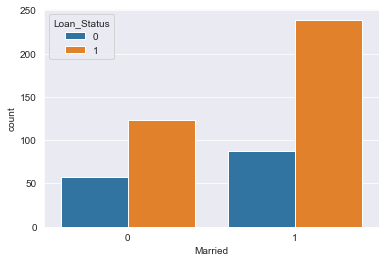

In [91]:
# Married & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=df)

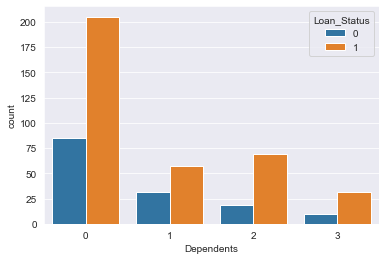

In [92]:
# Dependents & Loan Status
sns.countplot(x='Dependents',hue='Loan_Status',data=df)

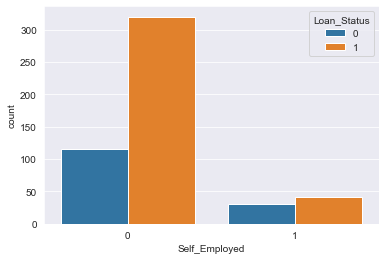

In [93]:
# Self_Employed & Loan Status
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

In [94]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,SI,Loan_Status
609,LP002978,0,0,0,1,0,2900,0.0,71000.0,360.0,1.0,2,1400.548,1
610,LP002979,1,1,3,1,0,4106,0.0,40000.0,180.0,1.0,2,394.521,1
611,LP002983,1,1,1,1,0,8072,240.0,25300.0,360.0,1.0,2,998.137,1
612,LP002984,1,1,2,1,0,7583,0.0,180700.0,360.0,1.0,2,7128.986,1
613,LP002990,0,0,0,1,1,4583,0.0,133.0,360.0,0.0,2,1.254,0


In [95]:
#spliting the dataset
dependent = ['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount',
                 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
X = df[dependent]
Y = df.Loan_Status

In [96]:
## split dataset into test and traning
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)
print ('Train set:', X_train.shape, Y_train.shape)
print ('Test set:', X_test.shape, Y_test.shape)

Train set: (456, 11) (456,)
Test set: (51, 11) (51,)


In [97]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [98]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.9539473684210527


In [99]:
# accuracy score on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.9803921568627451


In [100]:
##formula##
r = (df['SI']*100)/(df['LoanAmount']*(df['Loan_Amount_Term'])/365)
df.loc[df["Loan_Status"] == 1, "Rate_of_Interst"] = r
df['Rate_of_Interst'] = df['Rate_of_Interst'].fillna(0)


In [101]:
## Applying LogisticRegression

In [102]:
X = preprocessing.StandardScaler().fit(X).transform(X)
#split dataset into test and traning
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)
print ('Train set:', X_train.shape, Y_train.shape)
print ('Test set:', X_test.shape, Y_test.shape)

Train set: (354, 11) (354,)
Test set: (153, 11) (153,)


In [103]:
model = LogisticRegression()

In [104]:
#training the Logistic Regression model with training data
model.fit(X_train, Y_train)

LogisticRegression()

In [105]:
#accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train) 
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.8531073446327684


In [106]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test) 
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.8431372549019608


In [107]:
Y_pred = model.predict(X_test)
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[ 18,  21],
       [  3, 111]], dtype=int64)

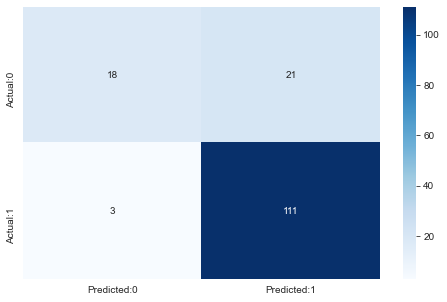

In [108]:
from sklearn.metrics import confusion_matrix, classification_report
 
cm = confusion_matrix(Y_test, Y_pred)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
mpt.figure(figsize = (8, 5))
sn.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Blues")
mpt.show()

In [109]:
#input_data = (1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2)
input_data = (1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0)

input_data_as_numpy_array = np.asarray(input_data) 

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1) 

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not eligible for loan')
  
else:
  print('\nThe person is eligible for loan')

[0]
The person is not eligible for loan


In [110]:
#input_data = (1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0)
input_data = (1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2)

input_data_as_numpy_array = np.asarray(input_data) 

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1) 

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 1):
  print('The person is not eligible for loan')
else:
  print('\nThe person is eligible for loan')


[0]

The person is eligible for loan


In [120]:
from sklearn.cluster import KMeans

In [121]:
kmeans=KMeans(n_clusters=2)

In [122]:
df['SI'], class_name = pd.factorize(df['Loan_ID'])
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

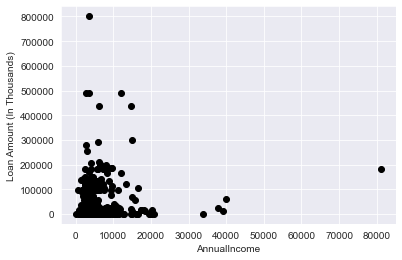

In [123]:
X = df[["LoanAmount","ApplicantIncome"]]
#Visualise data points
mpt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
mpt.xlabel('AnnualIncome')
mpt.ylabel('Loan Amount (In Thousands)')
mpt.show()

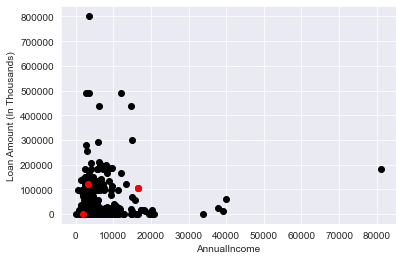

In [124]:
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
mpt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
mpt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
mpt.xlabel('AnnualIncome')
mpt.ylabel('Loan Amount (In Thousands)')
mpt.show()

In [125]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

<ipython-input-125-7e498e144d8d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-125-7e498e144d8d>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


62752.41291381482
49666.94945254732
69252.3270501995
100384.0356894688
20608.502666666693
22713.183727034128
26817.458758084947
32354.48154588866
1804.741354552929
614.4838125633132
0.0


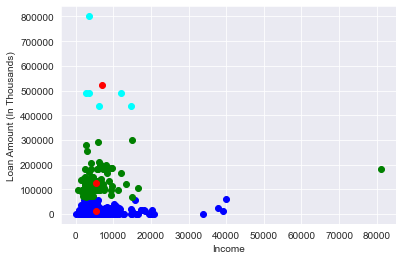

In [126]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    mpt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
mpt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
mpt.xlabel('Income')
mpt.ylabel('Loan Amount (In Thousands)')
mpt.show()

In [118]:
def highlight_cols(s):
    return 'background-color: % s' % 'yellow'
  
# highlighting the cells
display(df.style.applymap(highlight_cols, 
                          subset = pd.IndexSlice[:, ['Loan_Status', 'Rate_of_Interst']]))

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,SI,Loan_Status,Rate_of_Interst
0,LP001002,1,0,0,1,0,5849,1508.000000,3000.000000,300.000000,1.000000,2,0,1,1.000019
1,LP001003,1,1,1,1,0,4583,1508.000000,128.000000,360.000000,1.000000,0,1,0,0.000000
2,LP001005,1,1,0,1,1,3000,0.000000,66000.000000,365.000000,1.000000,2,2,1,0.986302
3,LP001006,1,1,0,0,0,2583,2358.000000,120220.000000,365.000000,1.000000,2,3,1,4.931792
4,LP001008,1,0,0,1,0,6000,0.000000,1410.000000,360.000000,1.000000,2,4,1,1.000011
5,LP001011,1,1,2,1,1,5417,4196.000000,2670.000000,360.000000,1.000000,2,5,1,2.113901
6,LP001013,1,1,0,0,0,2333,1516.000000,9005.000000,360.000000,1.000000,2,6,1,2.000001
7,LP001014,1,1,3,1,0,3036,2504.000000,15825.000000,360.000000,0.000000,1,7,0,0.000000
8,LP001018,1,1,2,1,0,4006,1526.000000,16835.000000,360.000000,1.000000,2,8,1,3.000003
9,LP001020,1,1,1,1,0,12841,10968.000000,349.000000,360.000000,1.000000,1,9,0,0.000000
